# **Linear Regression - A Linear Regression model using Gradient Descent.**

This notebook represents a minimal implementation of linear regression model with batch gradient descent.

It contains:
- Implementation of:
  - Cost function (`compute_cost`)
  - Gradient descent (`gradient_descent`)
  - Predictions using learned parameters  
- Visualizations using `matplotlib`  
- 📈 Cost vs Iterations plot


In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

## **Problem Statement:**

Predict house prices using linear regression and gradient descent on two data points.

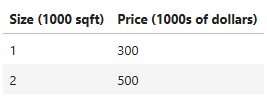

In [7]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 400.0])

**Compute Cost function**

Calculates the average squared error between predictions and actual target values.

In [3]:
def computeCost(x,y,w,b):
  m = x.shape[0]
  cost = 0

  for i in range(m):
    f_wb = w*x[i] + b
    diff = (f_wb - y[i])**2
    cost += diff

  avgCost = cost/(2*m)

  return avgCost

**Gradient Descent**

The gradient descent is an algorithm for finding the values of w and b that minimize the cost function.

$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x^{(i)}
$

$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$

The update rules:

$
w := w - \alpha \cdot \frac{\partial J}{\partial w}
$

$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$

**Compute Gradient**

This computes the gradient of the cost function with respect to w and b

In [5]:
def computeGradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

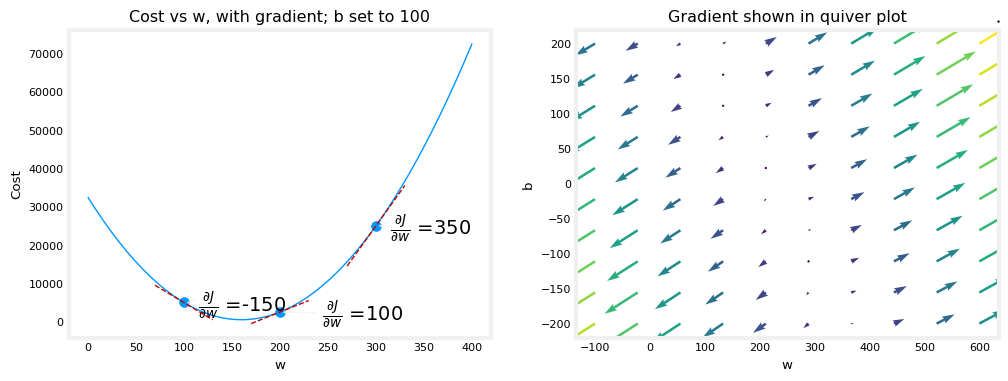

In [9]:
plt_gradients(x_train, y_train, computeCost, computeGradient)
plt.show()

**Gradient Descent**

A function for finding the values of w and b that minimize the cost function

In [13]:
def gradientDescent(x, y, w_init, b_init, alpha, iterations, cost_function, gradient_function):
  w = copy.deepcopy(w_init)
  w = w_init
  b = b_init
  j_hist = []
  p_hist = []

  for i in range(iterations):
    dj_dw, dj_db = gradient_function(x, y, w , b)

    b = b - alpha * dj_db
    w = w - alpha * dj_dw

    if i<100000:
        j_hist.append(cost_function(x, y, w , b))
        p_hist.append([w,b])

    if i% math.ceil(iterations/10) == 0:
        print(f"Iteration {i:4}: Cost {j_hist[-1]:0.2e} ",
              f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
              f"w: {w: 0.3e}, b:{b: 0.5e}")

  return w, b, j_hist, p_hist

In [14]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, j_hist, p_hist = gradientDescent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, computeCost, computeGradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.83e+04  dj_dw: -5.500e+02, dj_db: -3.500e+02   w:  5.500e+00, b: 3.50000e+00
Iteration 1000: Cost 1.17e+02  dj_dw:  2.173e+00, dj_db: -3.516e+00   w:  1.298e+02, b: 1.51833e+02
Iteration 2000: Cost 2.72e+01  dj_dw:  1.048e+00, dj_db: -1.695e+00   w:  1.143e+02, b: 1.76782e+02
Iteration 3000: Cost 6.31e+00  dj_dw:  5.049e-01, dj_db: -8.170e-01   w:  1.069e+02, b: 1.88808e+02
Iteration 4000: Cost 1.47e+00  dj_dw:  2.434e-01, dj_db: -3.938e-01   w:  1.033e+02, b: 1.94605e+02
Iteration 5000: Cost 3.41e-01  dj_dw:  1.173e-01, dj_db: -1.898e-01   w:  1.016e+02, b: 1.97400e+02
Iteration 6000: Cost 7.92e-02  dj_dw:  5.655e-02, dj_db: -9.150e-02   w:  1.008e+02, b: 1.98747e+02
Iteration 7000: Cost 1.84e-02  dj_dw:  2.726e-02, dj_db: -4.411e-02   w:  1.004e+02, b: 1.99396e+02
Iteration 8000: Cost 4.28e-03  dj_dw:  1.314e-02, dj_db: -2.126e-02   w:  1.002e+02, b: 1.99709e+02
Iteration 9000: Cost 9.93e-04  dj_dw:  6.334e-03, dj_db: -1.025e-02   w:  1.001e+02, b: 1.99860e+02


**Cost versus iterations of gradient descent**

This plot shows how the cost **decreases** over each iteration of gradient descent, helping visualize whether the algorithm is effectively minimizing the error.

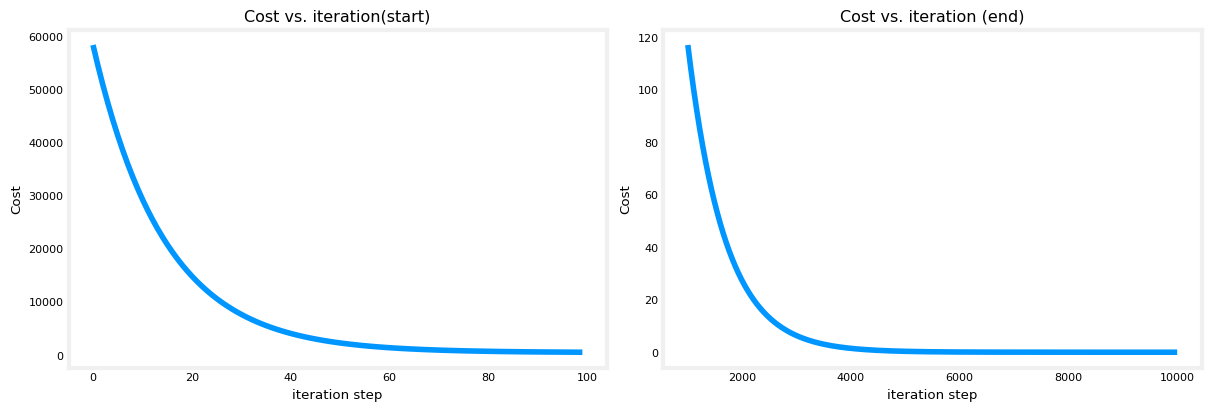

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

Predictions

In [19]:
print(f"2700 sqft house prediction {w_final*2.7 + b_final:0.1f} Thousand dollars")
print(f"5000 sqft house prediction {w_final*5.0 + b_final:0.1f} Thousand dollars")

2700 sqft house prediction 470.0 Thousand dollars
5000 sqft house prediction 700.1 Thousand dollars
